## Introduction

This tutorial will introduce you to different approach for analyzing stock market data using time series modeling and machine learning. I will be focusing on how to extract, visualize and analyze stock prices and market behavior. Afterwards, this data will be used to do predictions with Neural Networks and TensorFlow.

### Content

In this tutorial, I will show how to do stock market analysis and predictions using Quandl API to extract data and TensorFlow for building NN models.

I will cover:
- Installing libraries
- Loading data from Quandl
- Data visualization
- NN applied to stock price prediction

## Installing Libraries

First, we will start installing all the required libraries. For  data extraction, we need the Quandl package for which Anaconda has an installation command:

    $ conda install -c anaconda quandl

In [1]:
import quandl
import matplotlib
from matplotlib.finance import candlestick_ohlc
# Use svg backend for better quality
# AUTOLAB_IGNORE_START
matplotlib.use("svg")
# AUTOLAB_IGNORE_STOP
import matplotlib.pyplot as plt
# AUTOLAB_IGNORE_START
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) # you should adjust this to fit your screen
# AUTOLAB_IGNORE_STOP
import pandas as pd
import numpy as np
import tensorflow as tf

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Loading Data from Quandl

We will be using Quandl dataset to obtain US stock market information. Quandl has two possible ways of obtaining data: by directly making API calls or using a specific Python library. I will use the later, but feel free to discover more [Quandl API for Stock Data Blog](https://blog.quandl.com/api-for-stock-data) and [API documentation](https://docs.quandl.com/docs/getting-started).

In both cases, we need an API key to pull the data: create an account and follow the instructions [API documentation](https://docs.quandl.com/docs/getting-started). As seen in Yelp HW, store the API key in a .txt in the same directory as the python code.

Afterwards, you will be able to stablish the connection:
```python
quandl.ApiConfig.api_key = key
```

In [2]:
# Add directory if .txt file is not store in the same folder as the code
filename = 'api_key.txt'

with open(filename, 'r') as f:
        key = f.read().replace('\n','')
    
quandl.ApiConfig.api_key = key

Quandl has unlimited databases (free or premium). We will look at a free database of stock market data [Wiki Prices](https://www.quandl.com/databases/WIKIP). It contains prices, dividends and splits for around 3,000 US companies that are publicly-traded and is updated every weekday.

We will start by generating a function that will return the market information of any given stock by stock code. Quandl API calls look like:
```python
quandl.get('database_code/dataset_code', start_date='2005-03-31', end_date='2018-03-31', order='asc', collapse='daily', transform=None)
```
Mandatory parameters are:
- Database Code: 'WIKI'
- Dataset Code: stock code

For this exercise, we will specify, start_date and end_date, collaps (granularity of the data) and transform (common data operations). To understand better the nature of the parameters and  possible values they can take have a look at [time-series parameters](https://docs.quandl.com/docs/parameters-2).

In [3]:
def get_stock_data(dataset_code, start_date='2005-03-31', end_date='2018-03-31', order='asc', collapse='daily', transform=None):
    """ Get stock market data for a company. 
            Args: 
                dataset_code (String) : String representing the company/dataset code
                start_date (String) : String representing the start date of the data (yyyy-mm-dd format)
                end_date (String) : String representing the end date of the data (yyyy-mm-dd format)
                order (String) : String representing the order in which the data will be pulled out ('asc' for ascending and 'desc' for descendint)
                collaps (String) : String representing the granularity of the data (None, 'daily', 'weekly', 'monthly', 'quarterly' or 'annual')
                transform (String) : String representing the transformation to make to the data (None, 'diff', 'rdiff', 'rdiff_from', 'cumul' or 'normalize')
            Return: 
                stock_data (pd.DataFrame) : dataframe of stock price data
            """
    return quandl.get('WIKI/' + dataset_code, start_date=start_date, end_date=end_date, collapse=collapse, transform=transform)

Afterwards, we will get stock information of the main 5 technological companies using their code:
- Facebook (FB)
- Amazon (AMZN)
- Apple (AAPL)
- Microsoft (MSFT)
- Google (GOOGL)

In [4]:
data = []
stock_codes = ['FB', 'AMZN', 'AAPL', 'MSFT', 'GOOGL']

for code in stock_codes:
    data.append(get_stock_data(code))
    
data[0].head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0


### Donwloading Complete Database
We can also download the complete WIKI database that will save a zip file. It will contain all the stock prices in a csv file.
Extract the file and store it in the same directory as the tutorial, we will open it using Pandas csv reader. 

In [28]:
quandl.bulkdownload('WIKI')

'./WIKI.zip'

In [6]:
# Change the name of the csv file to WIKI.csv
complete_database = pd.read_csv('WIKI.csv', header=None, parse_dates=[1])
complete_database.columns = ['Code', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']
complete_database.head()

,Code,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,A,1999-11-18,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,31.041951,34.112034,27.289627,30.018590,44739900.0
1,A,1999-11-19,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,29.295415,29.336350,27.160002,27.548879,10897100.0
2,A,1999-11-22,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0,28.183363,30.018590,27.330562,30.018590,4705200.0
3,A,1999-11-23,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0,28.995229,29.766161,27.460188,27.460188,4274400.0
4,A,1999-11-24,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0,27.378319,28.613174,27.289627,28.012803,3464400.0


As it can be observed, the data we obtained is not exactly in the same structure as when we pull data individually. Therefore, we will create a dictionary of stock data. Each of the keys of the dictionary (stock code), will be linked to a dataframe that will contained the stock information, the index of the dataframe will be the date as with direct API calls.

In [7]:
db = list(complete_database.groupby(['Code']))

dict_stocks = {}

for stock in db:
    df_stock = stock[1].loc[:, stock[1].columns != 'Code']
    dict_stocks.update({stock[0] : df_stock.set_index('Date')})
    
dict_stocks['FB'].head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0


## Data Visualization
Some of the visualization techniques have been based on [this article](https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/).

### Single Stock Data
We will start looking at an individual stock data. The data frame provides information about different price points during a day, therefore a common way of plotting all this information in one single graph is by using a technique named as Japanese Candlestick for which matplotlib has its own [libary](https://matplotlib.org/api/finance_api.html).

In [8]:
import matplotlib.dates as dates

def plot_candlestick(stock_series, days=-1):
    """ Plot stock data in candle stick format. 
            Args: 
                stock_series (pd.DataFrame) : dataframe of stock data
                days (int) : Integer that indicates the number of days to plot (plot the last n days)
            """
    fig, ax = plt.subplots()

    stock_series = stock_series.reset_index()
    stock_series['Date'] = stock_series['Date'].apply(dates.date2num)
    candlestick_ohlc(ax, stock_series.tail(days).values, colorup='k', colordown='r')
    
    ax.xaxis_date()
 
    plt.show()

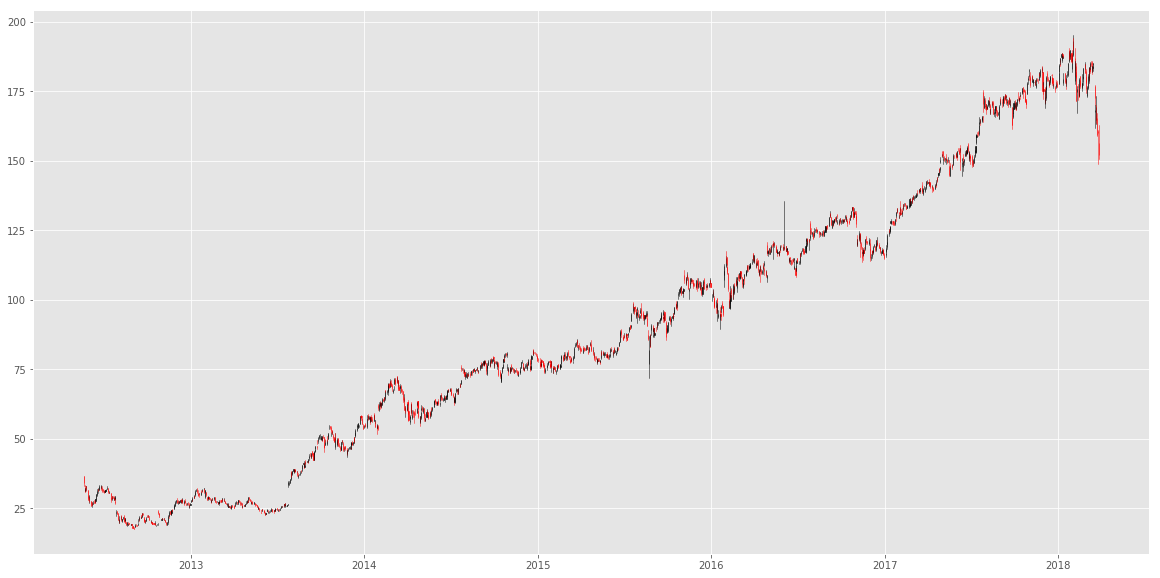

In [9]:
candlestick_data = data[0]
plot_candlestick(candlestick_data[['Open', 'High', 'Low', 'Close']])

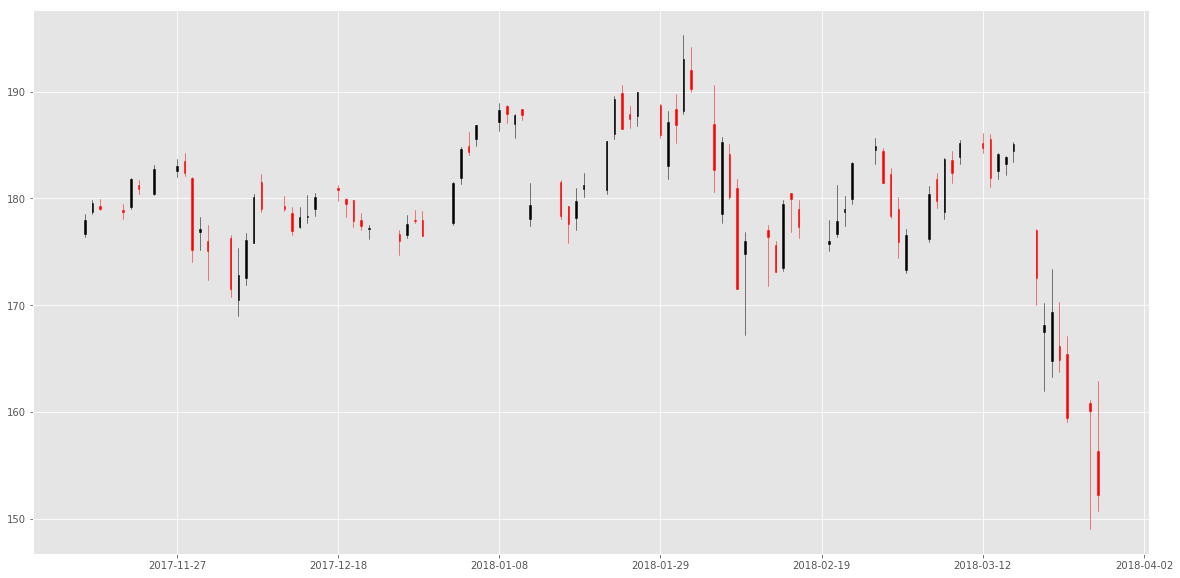

In [10]:
plot_candlestick(candlestick_data[['Open', 'High', 'Low', 'Close']], 90)

### Comparing Different Stocks
Different stocks' prices can also be compare to see trends. Let's look at the technology companies we have selected earlier and their adjusted close prices.
They all have similar trends; the prices have increased considerably from 2012 on (specially for Google and Amazon). But the price ranges are not comparable as FB, Microsoft and Apple's prices are considerably lower than the other two. Therefore, an option will be to normalize the data by dividing each value with the first one.

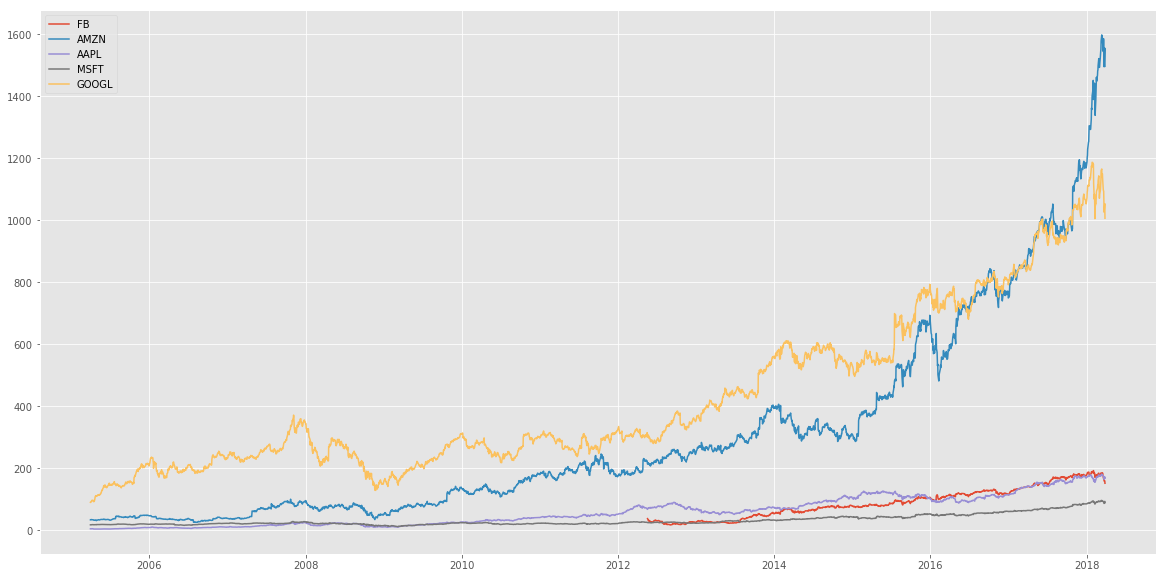

In [11]:
for stock in data:
    plt.plot(stock['Adj. Close'])

plt.legend(stock_codes)
plt.show()

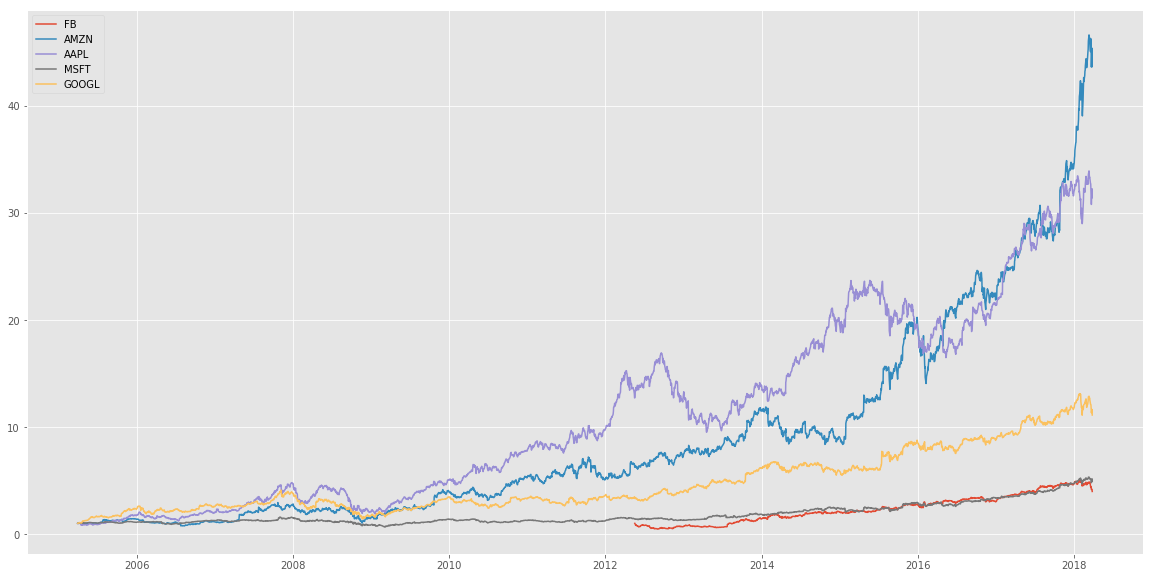

In [12]:
for stock in data:
    plt.plot(stock['Adj. Close']/stock['Adj. Close'][0])

plt.legend(stock_codes)
plt.show()

From here we can see, that none of the prices has gone below our staring price.

### Changes in Prices
Another interesting analysis is to track the change in value over time. We will plot this change for the last year of the previous 5 companies. They all have similar trajectories, but an interesting point is the spike of Amazon's stocks around November 2017.

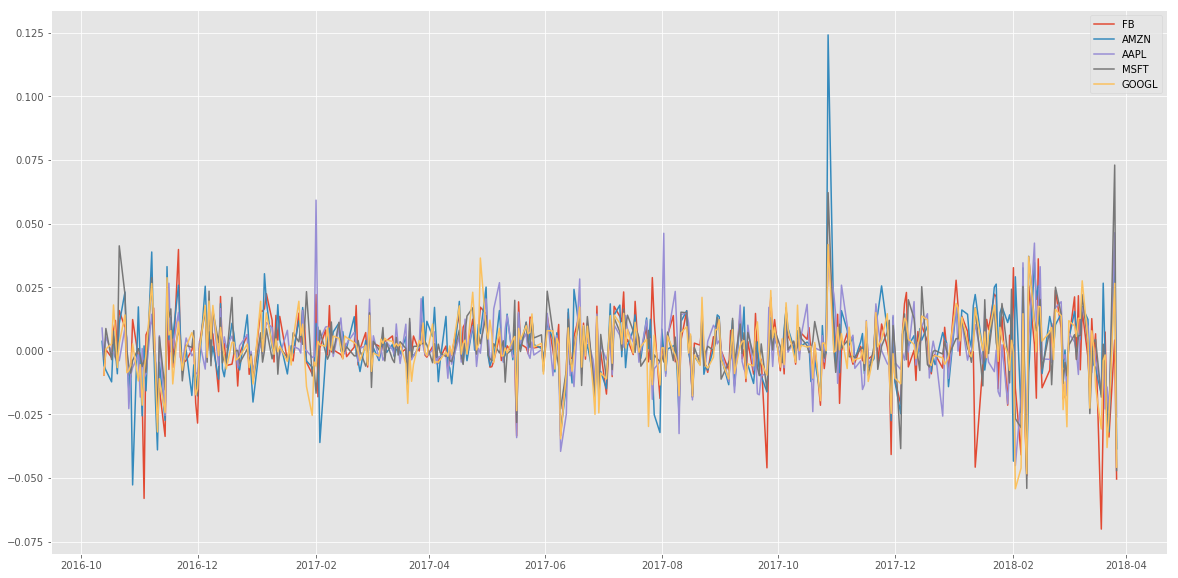

In [13]:
for stock in data:
    change = np.log(stock['Adj. Close'].tail(n=365)) - np.log(stock['Adj. Close'].tail(n=365).shift(1))
    plt.plot(change)
    
plt.legend(stock_codes)
plt.show()

## NN Applied to Stock Market Prices
Depending on the goal you want to achieve, there are several ML models to predict stock market behavior such as SVM, Neural Networks, Reinforcement Learning techniques or Recurrent Neural Networks. In this tutorial, we will have a look at Neural Networks. For simplification, we will be focusing on predicting Facebook close prices by using the rest of the companies' closing stock prices obtained from Quandl.

### Preprocessing
The data should first be processed to have cleaned and normalized data to feed into the model. We will:
1. Divide data into FB prices (variable to predict) and the rest of the prices (explanatory variables).
2. Match FB stock price dates with the rest of the prices' dates and remove columns (company prices) which contain one or more NaN values.
3. Divide the data into Training (80%) and Testing (20%) datasets.

In [14]:
def preprocess_data(data, y_code='FB'):
    y = data[y_code]['Close'].values
    X = np.zeros((y.shape[0], (len(data) - 1)))
    
    dates = data[y_code].index
    
    X_data = dict(data)
    del X_data[y_code]
    
    del_indx = []
    for i, (key, value) in enumerate(X_data.items()):
        x = value.loc[dates, 'Close'].values
        if (np.isnan(x).any()):
            del_indx.append(i)
        else:
            X[:, i] = x
    
    X = np.delete(X, del_indx, 1)

    cut_indx = int(np.floor(0.8*y.shape[0]))
    
    return X[0:cut_indx, :], y[0:cut_indx], X[cut_indx:-1, :], y[cut_indx:-1]

In [15]:
X_train, y_train, X_test, y_test = preprocess_data(dict_stocks)

print(X_train[:10])
print(y_train[:10])

[[ 38.73  10.06  25.44 ...,   2.75   7.16  32.59]
 [ 39.99  10.71  25.86 ...,   2.77   7.09  33.35]
 [ 40.49  10.62  26.32 ...,   2.75   6.8   33.93]
 ..., 
 [ 41.35  12.69  26.57 ...,   2.55   5.87  34.77]
 [ 40.66  13.22  26.55 ...,   2.46   6.26  36.79]
 [ 38.22  12.64  26.41 ...,   2.46   6.01  35.06]]
[ 38.2318  34.03    31.      32.      33.03    31.91    28.84    28.19
  29.6     27.72  ]


In [16]:
print(X_train.shape, X_test.shape)

(1176, 2127) (293, 2127)


### Normalizing Data
It is common in ML models to normalized the features so that their values are between 0 and 1. For that purpose, we will use the Sklearn preprocessing library and its MinMaxScaler class. This class with store the minimum and maximum value of a certain dataset (for us X_train) and will normalize other matrix values with those two limits. Note that we should always use the min and max values of the training dataset to fit both the training and testing sets.

In [17]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(X_train, X_test):
    norm = MinMaxScaler()
    norm.fit(X_train)
    X_train = norm.transform(X_train)
    X_test = norm.transform(X_test)
    
    return X_train, X_test

In [18]:
X_train, X_test = normalize_data(X_train, X_test)

print(X_train[:10])

[[ 0.19448476  0.00327154  0.25384998 ...,  0.10510511  1.          0.67275986]
 [ 0.24020319  0.0174482   0.27471436 ...,  0.11111111  0.98691589  0.7       ]
 [ 0.25834543  0.01548528  0.29756582 ...,  0.10510511  0.93271028
   0.72078853]
 ..., 
 [ 0.28955007  0.0606325   0.3099851  ...,  0.04504505  0.7588785
   0.75089606]
 [ 0.26451379  0.07219193  0.30899155 ...,  0.01801802  0.8317757
   0.82329749]
 [ 0.17597968  0.05954198  0.30203676 ...,  0.01801802  0.78504673
   0.76129032]]


### NN Introduction
[NNs](https://en.wikipedia.org/wiki/Artificial_neural_network) are based on the interconnection of animals' nervous system. They get an input and transform it through different layers of neurons using an activation functions.
To better observe the structure of a NN, have a look at the following image.

<img src="Files/NN_Graph.jpg" style="width: 40%; height: 40%">

NN consist of different components:
- Data sample: input $$\{x_1, x_2,..., x_n\}$$
- Hidden Layers: levels of data transformation. Each layer is composed of different numbers of neurons, which in the image is D. In addition, the neurons have an associated activation function that to transform the data.
- Connections: links output of one neuron to the input of the next one. Each connection is usually assigned a weight and their own bias.
- Output: desired prediction. For us, y or the predicted FB close price.

The math behind:
- Outputs for hidden layers
$$\mathbf h_{1,1}(x) = \mathbf a(\sum_{i}^D x . w_{i,1} + b_1)$$
$$\mathbf h_{1,2}(x) = \mathbf a(\sum_{i}^D x . w_{i,2} + b_2)$$
$$...$$
$$\mathbf h_{1,d}(x) = \mathbf a(\sum_{i}^D x . w_{i,d} + b_d)$$
- Final output
$$\mathbf y(h_1) = \mathbf a(h_1 . w_o + b_o)$$

We can add as many hidden layers as wanted and there are different activation functions that will be discussed later.

### Tensorflow Introduction
[Tensorflow](https://www.tensorflow.org) is a open source ML framework that simplifies the process of creating models such as NN. The way TensorFlow works is by defining input and output values as "placeholders", parameters as "variables" and provides a way of adding different hidden layers to the graph with the desired activation function. As any other ML, we will also need to specify a optimization function. Once the model is defined, it has to be trained to predict prices.
First, let's have a look at the NN structure we will create. Note that we will use a matrix representation of the NN as it is more efficient and is the way TensorFlow works.

<img src="Files/NN_Graph_TF.jpg" style="width: 40%; height: 40%">

The NN will have 4 hidden layers of sizes: 1024, 512, 256, 128. Moreover, we will use a technique known as mini-batch gradient descent to learn the weights of the different layers. This consists on training the model using a batch of samples instead of just one sample per iteration. This makes the learning process faster and more efficient. This model and the following code have been inspired on [this article](https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877).

### Creating the Inputs and Parameters
#### 1. Initialize Placeholders
Placeholders are data structures that we define in advanced and will be feed later on the process. They are used to represent inputs and output of NNs.
```python
X = tf.placeholder(dtype=tf.float64, shape=[None, num_features])
y = tf.placeholder(dtype=tf.float64, shape=[None])
```
The inputs will be two-dimensional [None, num_features] and outputs will be one-dimensional [None].
#### 2. Create the Initializers
TF has also a way of initializing the parameters for the network.
- Weights are initialized randomly as some of the activation functions will not work properly otherwise:
```python
 tf.variance_scaling_initializer(dtype=tf.float64, mode="fan_avg", distribution="uniform", scale=sigma)
```
- Bias terms are commonly set to 0:
```python
tf.zeros_initializer(dtype=tf.float64)
```

#### 3. Generate Parameters
For each of the hidden layers we need weights and bias terms for which we will use the previously defined initializers:
```python
# Weights
tf.Variable(weight_initializer([prev_layer_size, current_layer_size]))
# Bias
tf.Variable(bias_initializer([current_layer_size]))
```
This has to be done for the output layer too.
#### 4. Create the Hidden Layers
Once we have the weights defined, we can start creating the hidden layers. For this, an activation function should be chosen. The most common ones are:
- Sigmoid: $$\mathbf a(x) = \frac{1}{1 + e^{-x}}$$
- Tanh: $$\mathbf a(x) = \frac{2}{1 + e^{-2x}} - 1 = 2 sigmoid(2x) - 1$$
- ReLU: $$\mathbf a(x) = max(0,x)$$

In this case, we will use the ReLU Function, but you are welcome to try different ones. With ReLU, creating a hidden layer will look like:
```python
tf.nn.relu(tf.add(tf.matmul(prev_layer_output, layer_weights), layer_bias))
```
In which you are indicating that there will be a matrix multiplication (tf.matmul()) between the outputs of the previous layer and the weights of the current layer and the bias term of the layer will also be added (tf.add()). Afterwards, the result will be passed to the activation function (tf.nn.relu()).
The final output layer should be transposed so that we have the correct dimensions. Note that there is no activation function for the output layer.
```python
tf.transpose(tf.add(tf.matmul(output_last_layer, output_wights), output_bias))
```
#### 5. Define the Objective Function and  Optimizer
As we are dealing with a regression problem, our objective function will be the Mean-Squared Error of our predictions compared with the actual FB stock prices. TF has a predefined method:
```python
tf.reduce_mean(tf.squared_difference(output, y))
```
We will then assign that function to the TF optimizer which we want to minimize:
```python
tf.train.AdamOptimizer().minimize(mse)
```

In [19]:
class NN_model:
    def __init__(self, X_train, y_train, X_test, y_test, n_layers=[1024, 512, 256, 128], n_output=1):
        # Set Training and Testing Samples
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        # Inputs and output with Tesorflow placeholders
        self.X = tf.placeholder(dtype=tf.float64, shape=[None, X_train.shape[1]])
        self.y = tf.placeholder(dtype=tf.float64, shape=[None])
        
        # Initializers
        sigma = 1
        weight_initializer = tf.variance_scaling_initializer(dtype=tf.float64, mode="fan_avg", distribution="uniform", scale=sigma)
        bias_initializer = tf.zeros_initializer(dtype=tf.float64)
        
        # Generate weights and biases for each of the layers
        W = []
        b = []
        for i in range(len(n_layers)):
            if i == 0:
                W.append(tf.Variable(weight_initializer([X_train.shape[1], n_layers[i]])))
            else:
                W.append(tf.Variable(weight_initializer([n_layers[i -  1], n_layers[i]])))
                
            b.append(tf.Variable(bias_initializer([n_layers[i]])))
        
        # Output layer
        W_output = tf.Variable(weight_initializer([n_layers[3], n_output]))
        b_output = tf.Variable(bias_initializer([n_output]))
        
        # Hidden layers
        layers = []
        for i in range(len(n_layers)):
            if i == 0:
                layers.append(tf.nn.relu(tf.add(tf.matmul(self.X, W[i]), b[i])))
            else:
                layers.append(tf.nn.relu(tf.add(tf.matmul(layers[i - 1], W[i]), b[i])))

        # Output layer (must be transposed)
        self.output = tf.transpose(tf.add(tf.matmul(layers[-1], W_output), b_output))
        
        # Define the Objective Function - MSE
        self.mse = tf.reduce_mean(tf.squared_difference(self.output, self.y))
        # Create the Model Optimizer
        self.opt = tf.train.AdamOptimizer().minimize(self.mse)

### Training the Model
The TF model and its parameters are first initialized using tf.Session() and session.run(). Next, we will define the number of  epochs (100), how many times we will go through the whole training set and the size of the batches (256).
In each epoch, the data will be shuffled to avoid overfitting. And for each of the batches, we will update the parameters:
```python
session.run(optimizer, feed_dict={X: batch_x, y: batch_y})
```

In [20]:
class NN_model(NN_model):     
    def train(self) :
        # Make Session
        self.sess = tf.Session()
        # Run initializer
        self.sess.run(tf.global_variables_initializer())

        # Number of epochs and batch size
        epochs = 100
        batch_size = 256
        
        self.mse_train = []
        self.mse_test = []
        for e in range(epochs):
            # Shuffle training data
            shuffle_indices = np.random.permutation(np.arange(len(self.y_train)))
            X_train = self.X_train[shuffle_indices]
            y_train = self.y_train[shuffle_indices]

            # Minibatch training
            for i in range(0, len(y_train) // batch_size):
                start = i * batch_size
                batch_x = X_train[start:start + batch_size]
                batch_y = y_train[start:start + batch_size]

                # Run optimizer with batch
                self.sess.run(self.opt, feed_dict={self.X: batch_x, self.y: batch_y})
                
            self.mse_train.append(self.sess.run(self.mse, feed_dict={self.X: self.X_train, self.y: self.y_train}))     
            self.mse_test.append(self.sess.run(self.mse, feed_dict={self.X: self.X_test, self.y: self.y_test}))     

### Making Predictions
Once we have trained the model, it will be ready to make predictions using the testing data.
The predicted prices have been plotted to compare them with the actual FB stock prices. The results are not completely accurate, but most importantly, the model can predict the trend of the prices. When FB prices go up, the predictions do so. This indicates that changes in the prices can be predicted (ups and downs) which is a very important insight for investors.

In [21]:
class NN_model(NN_model):    
    def predictions(self):
        pred = self.sess.run(self.output, feed_dict={self.X: self.X_test})

        plt.plot(self.y_test, label='Real FB Close Price')
        plt.plot(pred.reshape((-1,)), label='Predicted FB Close Price')
        plt.title('NN Predictions vs Real Price')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()
        
    def plot_performance(self):
        plt.plot(self.mse_train, label='Training Dataset')
        plt.plot(self.mse_test, label='Testing Dataset')
        plt.title('NN Performance for Training and Testing Sets')
        plt.xlabel('Epochs')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()
        
        print(self.mse_test[-1])

In [22]:
NN = NN_model(X_train, y_train, X_test, y_test)
NN.train()

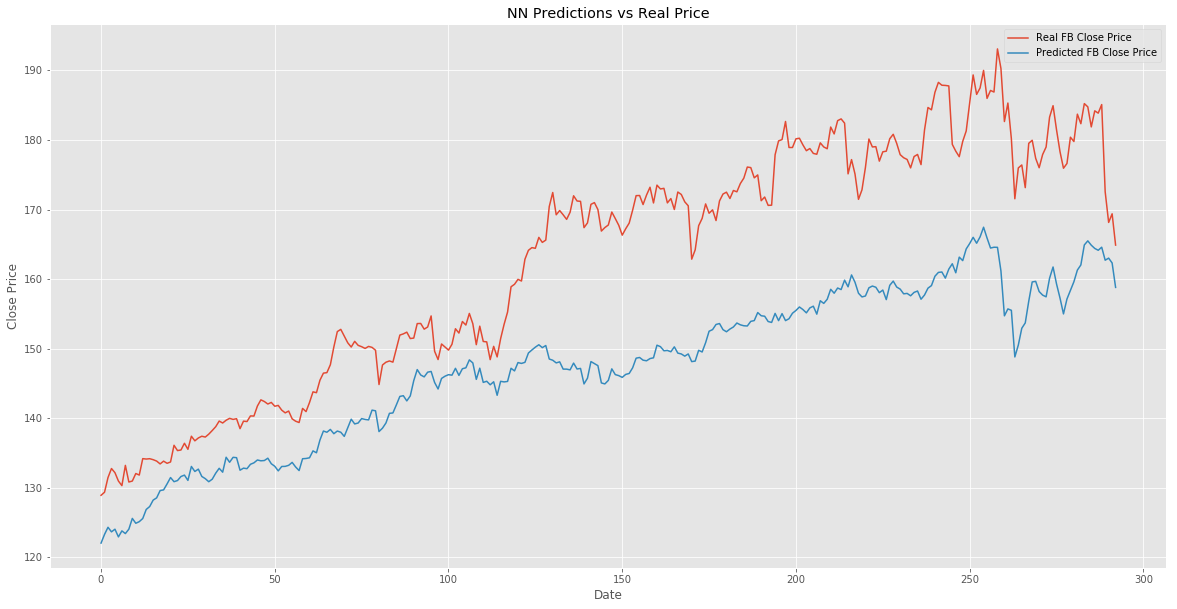

In [23]:
NN.predictions()

### Evaluating Performance
Lastly, we will compare the overall model performance for both the training and testing sets. As expected, the training set's MSE decreases considerably in the first 5 epochs and stays in values close to 0 afterwards. The testing set has a similar behavior reaching its best value around the 10th epoch and after it increases a little bit. This indicates that the model is overfitting the training set and it generalizes better on the 10th epoch than on the last epoch.

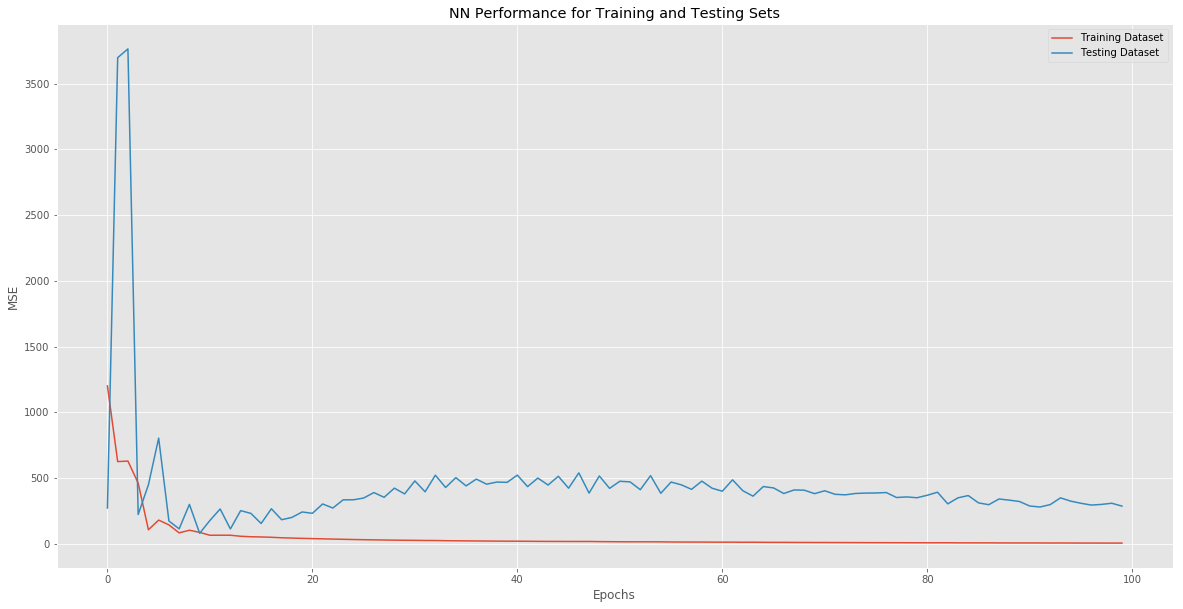

286.665948379


In [24]:
NN.plot_performance()

## References
1. Quandl (https://blog.quandl.com/api-for-stock-data)
2. Visualizaiton (https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/)
3. TensorFlow (https://www.tensorflow.org)
4. NN (https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877)